# Gaussian Receptive Fields

## Description
Temporal Encoding of continous input data. 

## Reference Papers
Wang, J., Belatreche, A., Maguire, L., & Mcginnity, T. M. (2014). **An online supervised learning method for spiking neural networks with adaptive structure**. Neurocomputing, 144, 526-536.

S.M. Bohte, H.L. Poutre , J.N. Kok, **Unsupervised clustering with spiking neurons by sparse temporal coding and multi-layer RBF networks**, in:Proceedings of the IEEE-INNS-ENNS International Joint Conference on Neural Networks, 2000, pp. 279–284.

### Contributor
Ajinkya Indulkar

In [1]:
# import libraries
import warnings
warnings.filterwarnings(action='ignore')

import scipy.stats
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import preprocessing

%matplotlib inline

## Part 1: Experimentation

Load IRIS Dataset

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

Create a vector (evenly spaced) for computing gaussian receptive fields. Increase granularity of this vector for smoother GRFs and spike time computation accuracy.

In [3]:
# grf input array
inp = np.around(np.arange(0, 10, 0.1), decimals=1)
inp_min = min(inp)
inp_max = max(inp)

Define number of neurons ($n$) required for the temporal encoding of input data. 

Compute sigma ($\sigma$) using the formula:

$\sigma = \frac{1}{\gamma}.\frac{\{I^i_{max} - I^i_{min}\}}{n - 2}$ ,where $i$ is input variable (sample), $\gamma$ works best with a value of **1.5** and $n > 0$

In [4]:
n = 20 # define number of neurons
sigma = (1/1.5) * (inp_max-inp_min)/(n-2) # compute standard deviation
sigma = round(sigma, 2) # round sigma to 2 decimal points

#### Compute Gaussian Receptive Fields

Compute Center of Gaussian ($\mu$) using the equation:

$\mu = I^n_{min} + \frac{2i - 3}{2}.\frac{\{I^i_{max} - I^i_{min}\}}{n - 2}$

In [5]:
# compute gaussian centers
mu = inp_min +  ((np.arange(0, n, 1) - 1.5) * (inp_max - inp_min) / (n-2))
mu

array([-0.825, -0.275,  0.275,  0.825,  1.375,  1.925,  2.475,  3.025,
        3.575,  4.125,  4.675,  5.225,  5.775,  6.325,  6.875,  7.425,
        7.975,  8.525,  9.075,  9.625])

Compute and Plot GRF for *inp* vector. Normalize it as the PDF returns a few values above 1.

In [6]:
# compute gaussian receptive fields
grf = np.array([scipy.stats.norm(mu[i], sigma).pdf(inp) for i in range(n)])
grf = preprocessing.normalize(grf, axis=0)

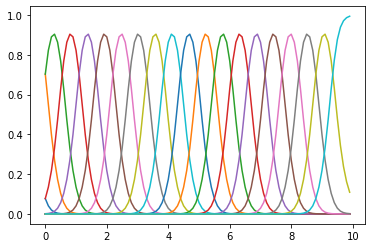

In [7]:
for i in range(n):
    plt.plot(inp, grf[i])

Compute Spike Timings

In [8]:
T_ref = 10 # Reference time for temporal encoding
spike_times = []
for i in range(len(X)):
    indices = np.where(np.in1d(inp, X[i]))[0] # extracts location of the elements of X[i] in inp array.
    spike_times_ps = [] # spike times per sample
    for idx in indices:
        grf_values = [-T_ref*g[idx]+T_ref for g in grf]
        spike_times_ps.append([-1 if g>=T_ref-1 else g for g in grf_values])
    spike_times_ps = np.around(np.array(spike_times_ps), decimals=2)
    spike_times.append(spike_times_ps)
    
spike_times = np.array(spike_times)

In [9]:
spike_times.shape

(150, 4, 20)

In [10]:
spike_times[0]

array([[-1.  ,  6.01,  1.1 ,  7.82, -1.  , -1.  , -1.  , -1.  , -1.  ,
        -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  ,
        -1.  , -1.  ],
       [-1.  , -1.  , -1.  ,  7.29,  0.96,  6.69, -1.  , -1.  , -1.  ,
        -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  ,
        -1.  , -1.  ],
       [-1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  ,  6.01,  1.1 ,
         7.82, -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  ,
        -1.  , -1.  ],
       [-1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  ,
        -1.  ,  5.27,  1.36,  8.27, -1.  , -1.  , -1.  , -1.  , -1.  ,
        -1.  , -1.  ]])

Observe Spike Times of the first sample

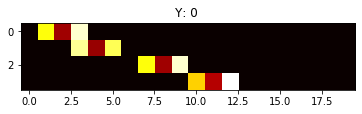

In [11]:
plt.imshow(spike_times[0], cmap='hot', interpolation='nearest')
plt.title("Y: {} ".format(y[0]))
plt.show()

Observe Spike Times for all samples

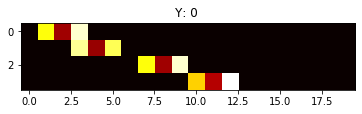

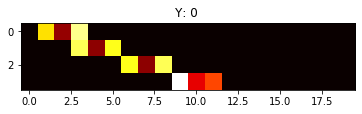

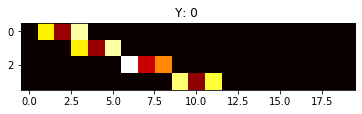

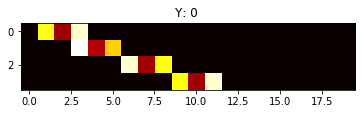

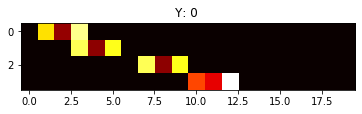

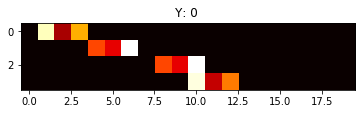

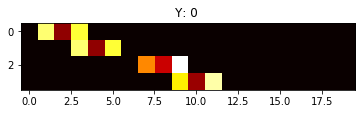

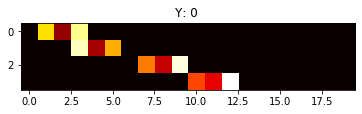

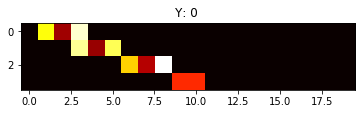

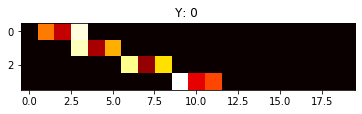

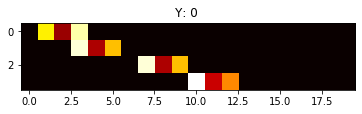

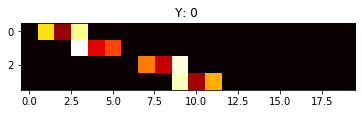

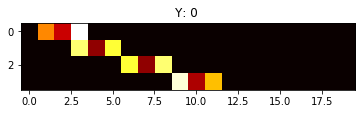

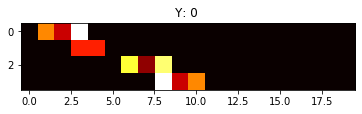

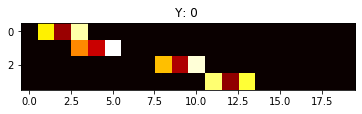

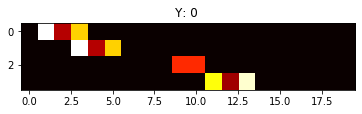

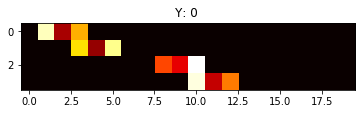

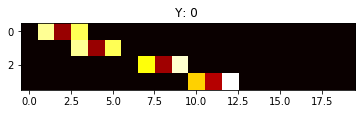

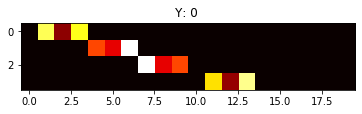

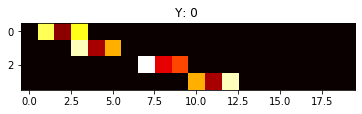

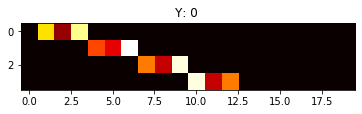

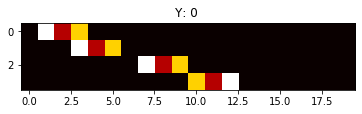

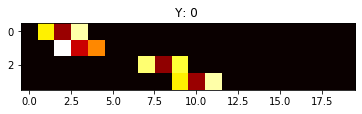

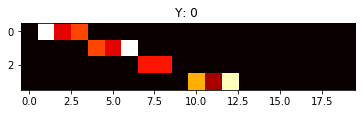

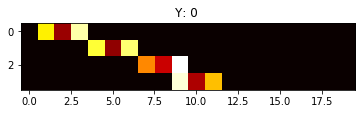

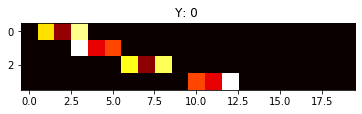

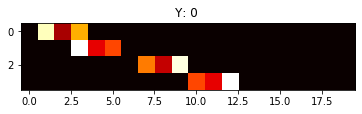

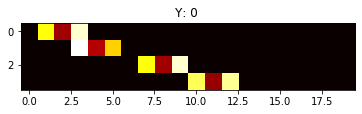

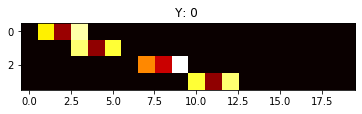

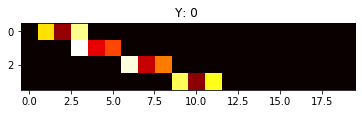

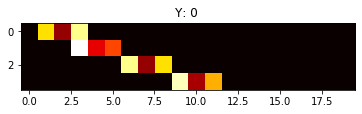

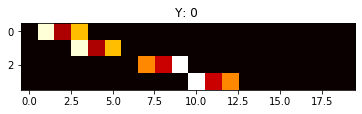

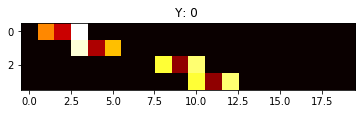

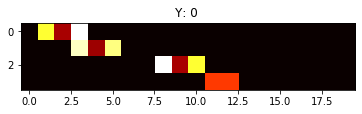

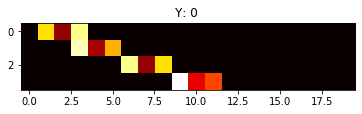

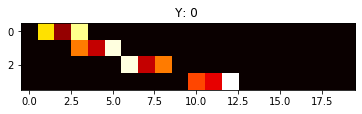

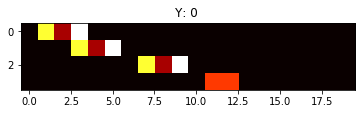

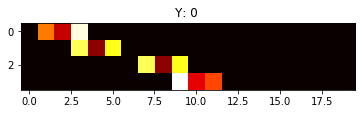

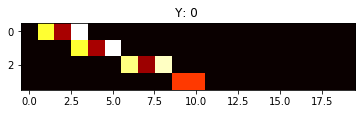

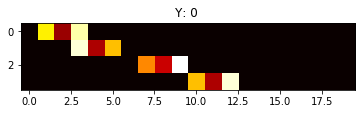

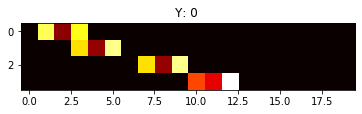

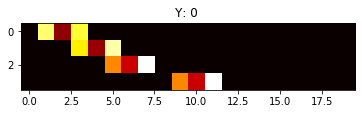

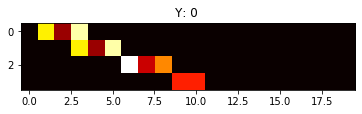

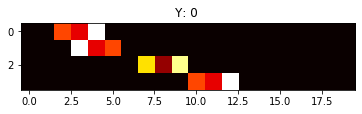

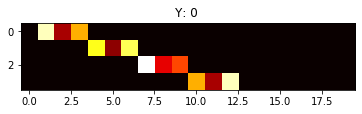

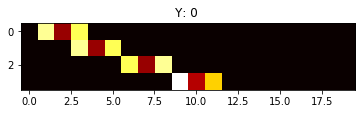

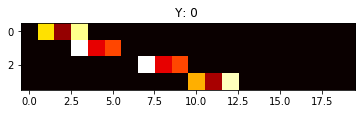

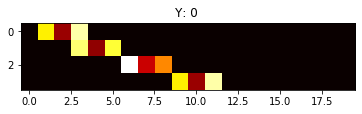

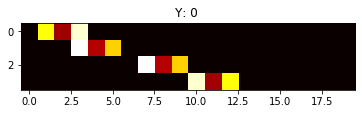

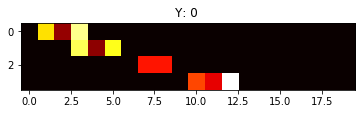

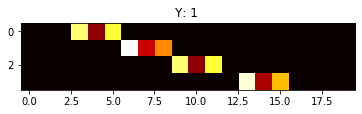

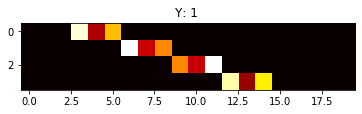

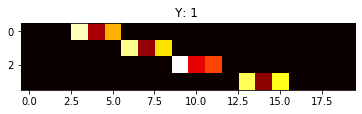

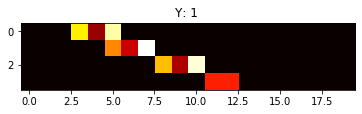

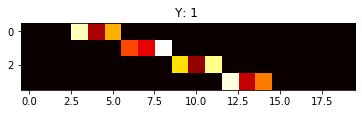

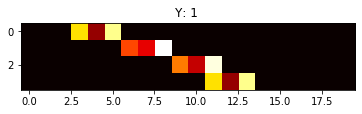

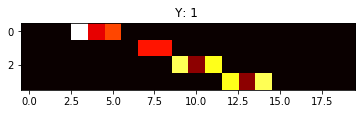

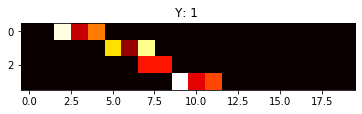

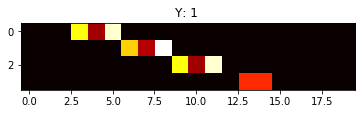

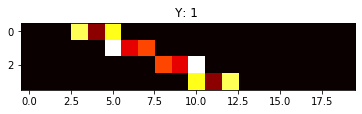

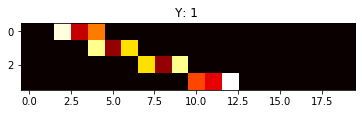

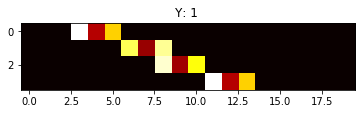

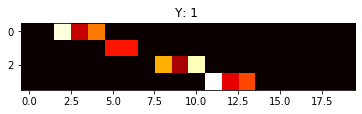

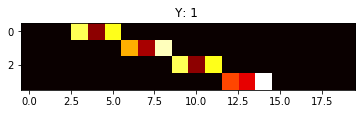

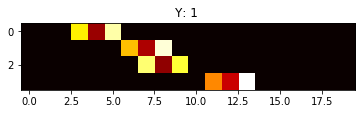

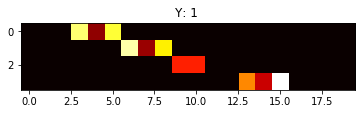

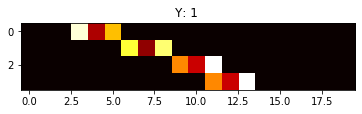

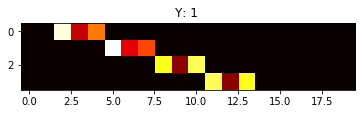

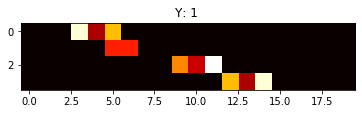

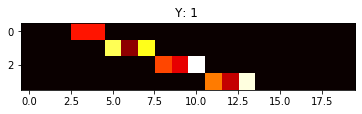

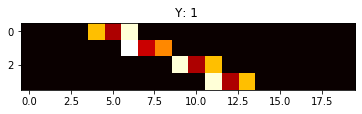

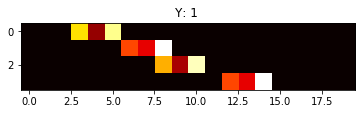

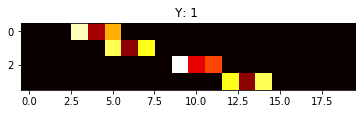

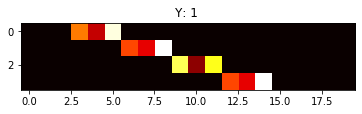

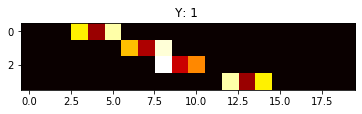

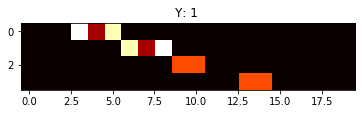

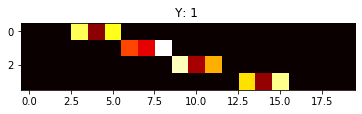

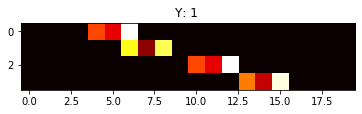

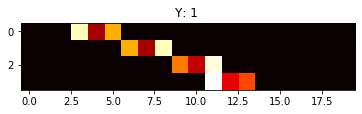

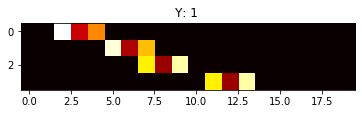

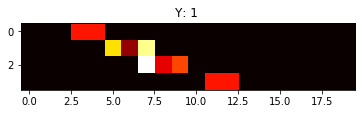

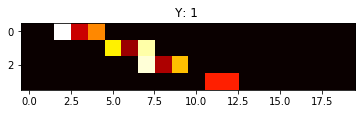

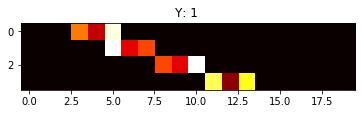

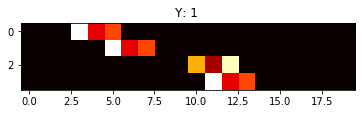

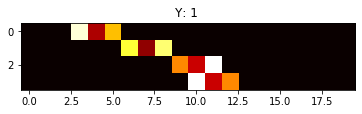

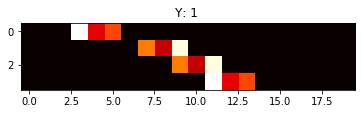

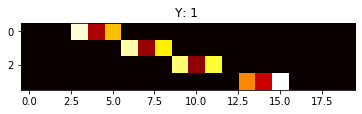

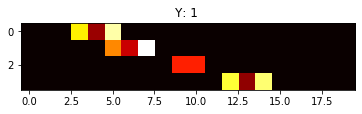

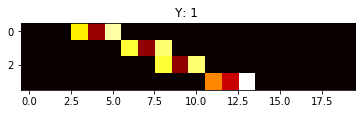

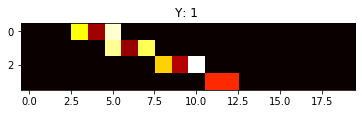

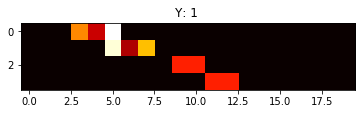

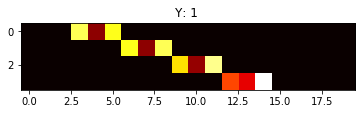

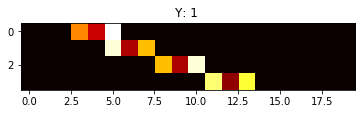

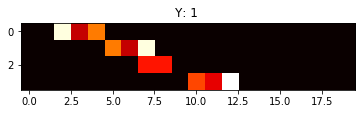

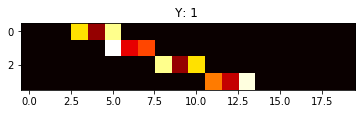

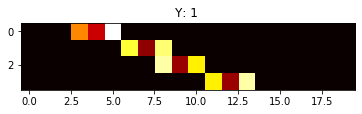

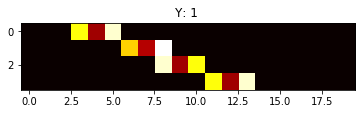

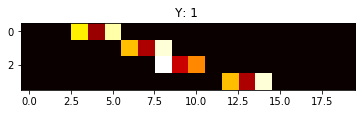

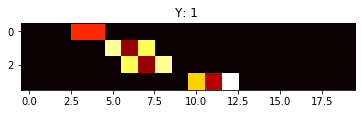

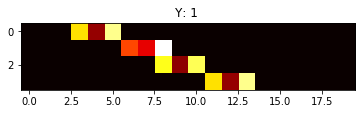

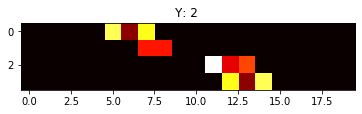

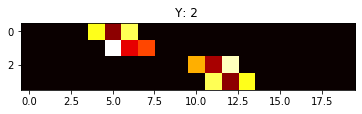

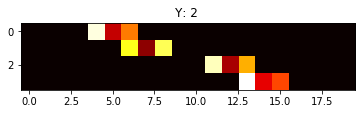

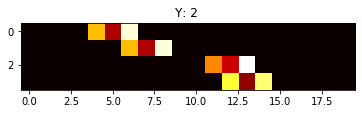

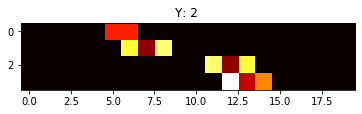

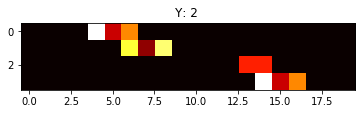

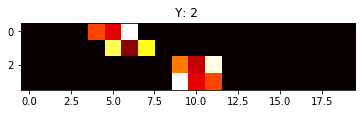

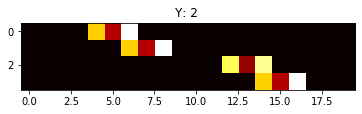

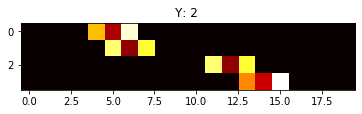

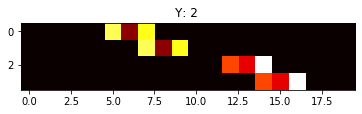

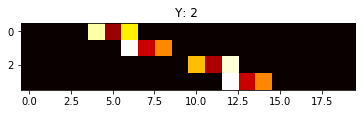

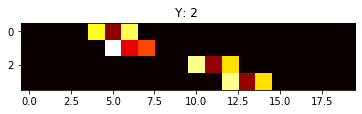

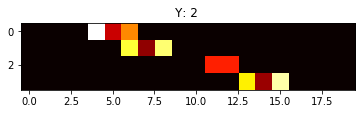

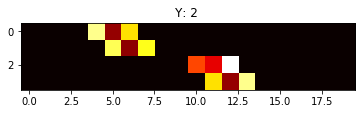

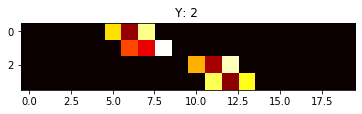

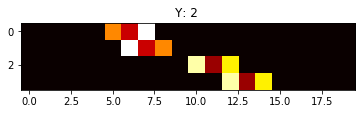

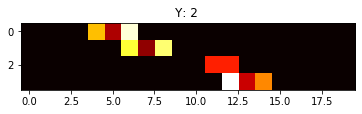

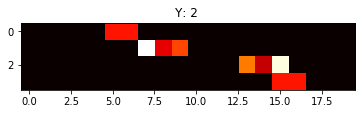

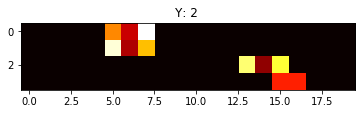

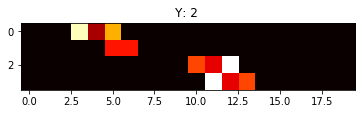

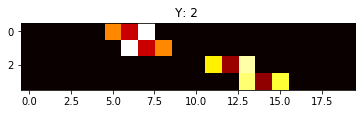

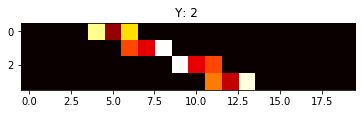

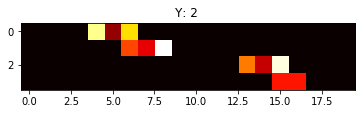

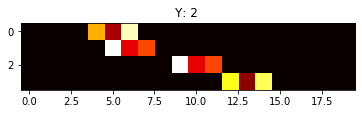

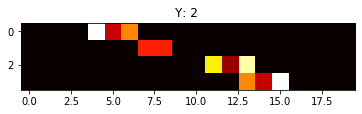

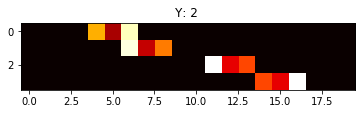

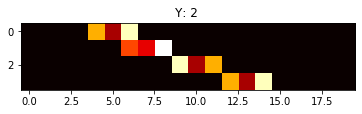

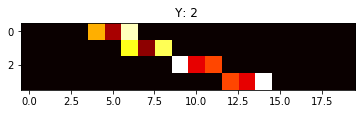

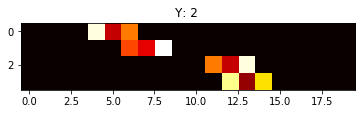

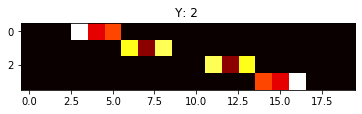

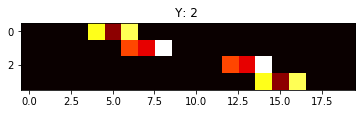

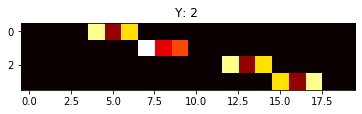

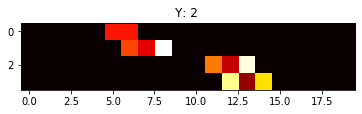

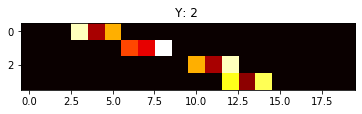

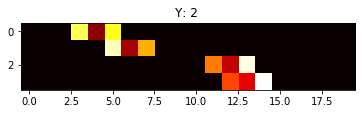

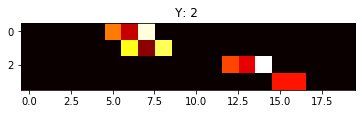

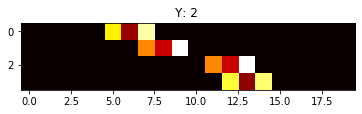

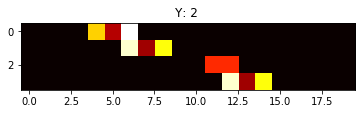

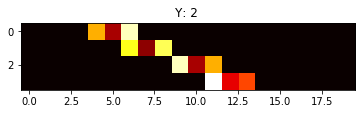

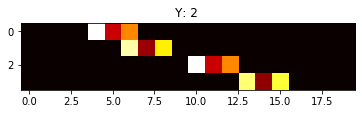

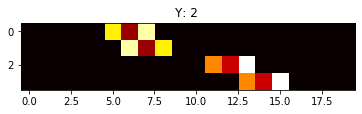

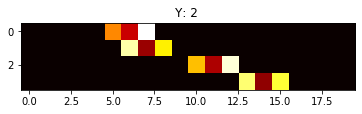

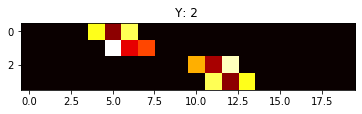

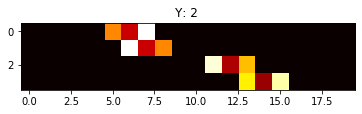

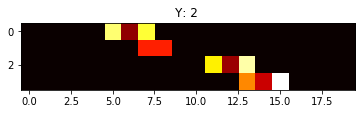

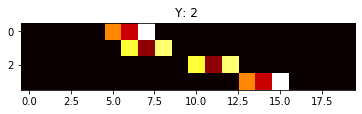

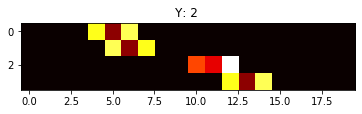

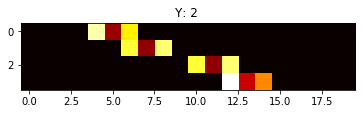

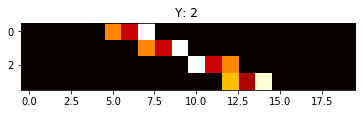

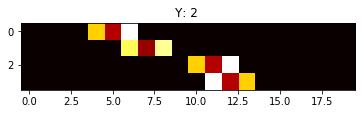

In [12]:
for i in range(len(X)):
    plt.imshow(spike_times[i], cmap='hot', interpolation='nearest')
    plt.title("Y: {} ".format(y[i]))
    plt.show()

## Part 2: Implementation

In [13]:
def gaussianRF(X, inp, n=20, T_ref=10):
    """
    @description:    
        Encoding input vector X via Gaussian Receptive Fields (GRFs)
    @arguments:
        X (array): dataset
        inp (array): input array for smooth GRFs
        n (int): number of neurons
        T_ref (int): Reference time for temporal encoding
    @returns:
        spike_times (array): array of spike times for all samples
    """
    # compute max and min of input
    inp_min = min(inp)
    inp_max = max(inp)
    # compute standard deviation
    sigma = (1/1.5) * (inp_max-inp_min)/(n-2)
    sigma = round(sigma, 2)
    # compute expectation
    mu = inp_min + ((np.arange(0, n, 1) - 1.5) * (inp_max - inp_min) / (n-2))
    # compute gaussian receptive fields
    grf = np.array([scipy.stats.norm(mu[i], sigma).pdf(inp) for i in range(n)])
    grf = preprocessing.normalize(grf, axis=0)
    # compute spike times for all instances of X
    spike_times = []
    for i in range(len(X)):
        # extract location of the elements of X[i] in inp array
        indices = np.where(np.in1d(inp, X[i]))[0]
        spike_times_ps = [] # spike times per sample
        for idx in indices:
            # compute spike times for all features (per sample)
            grf_values = [-T_ref*g[idx]+T_ref for g in grf]
            spike_times_ps.append([-1 if g>=T_ref-1 else g for g in grf_values])
        spike_times_ps = np.around(np.array(spike_times_ps), decimals=2)
        spike_times.append(spike_times_ps) # combine spike times of all samples
        
    spike_times = np.array(spike_times)
    return spike_times

In [14]:
def visualize_spikes(spike_times, label):
    plt.figure()
    plt.imshow(spike_times, cmap='hot', interpolation='nearest')
    plt.title("Label: {} ".format(label))
    plt.show()

Load Data and compute Spike Times for all samples

In [15]:
# load IRIS Dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# normalizing X
X_norm = np.around(preprocessing.normalize(X, axis=1), decimals=2)

In [16]:
# input vector
inp = np.around(np.arange(0, 1, 0.01), decimals=2)

In [17]:
# compute spike times
spike_times = gaussianRF(X_norm, inp, n=20, T_ref=10)

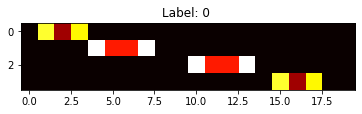

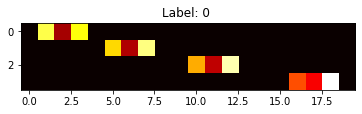

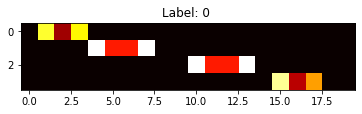

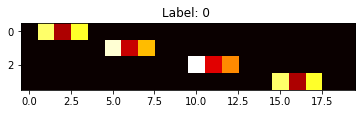

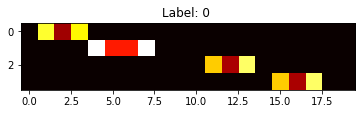

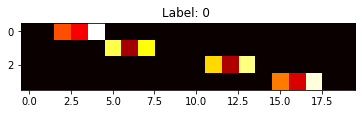

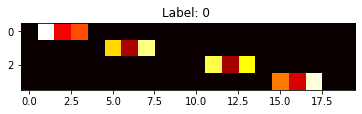

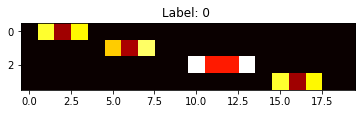

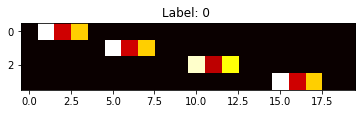

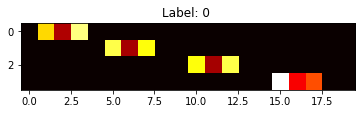

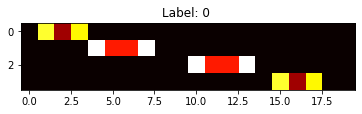

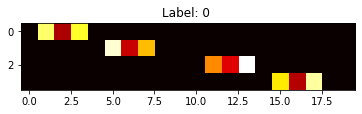

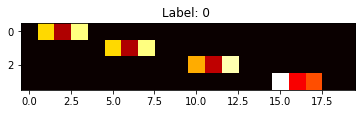

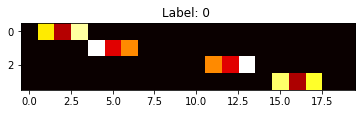

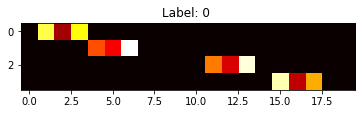

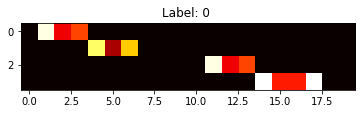

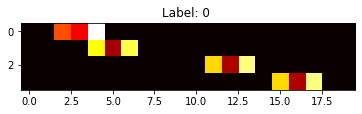

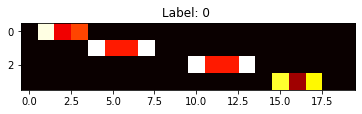

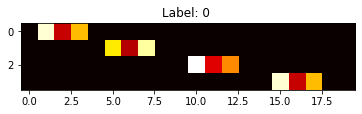

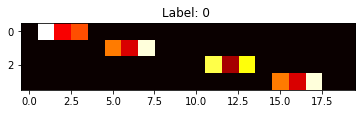

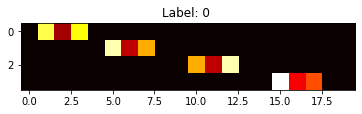

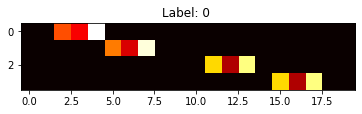

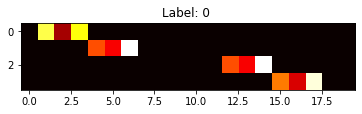

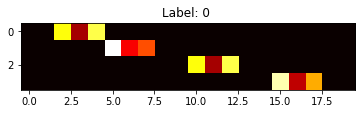

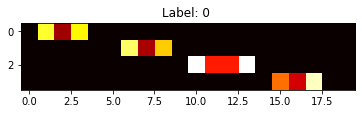

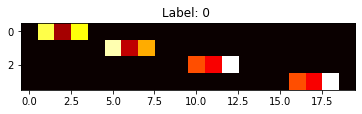

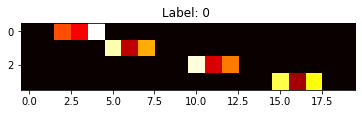

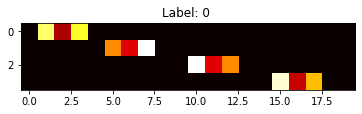

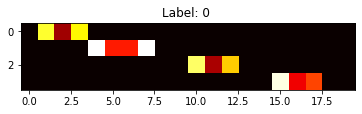

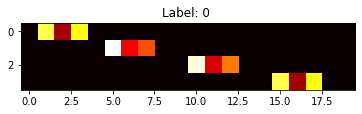

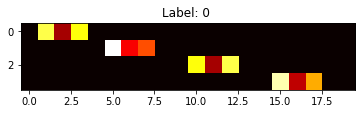

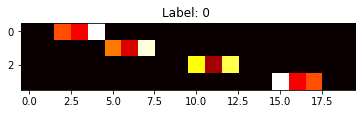

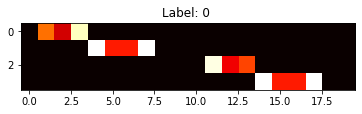

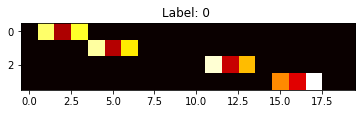

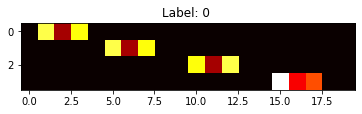

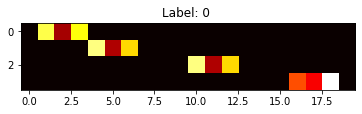

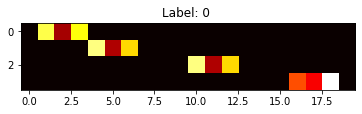

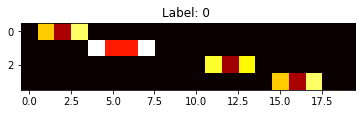

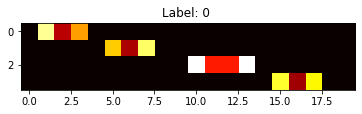

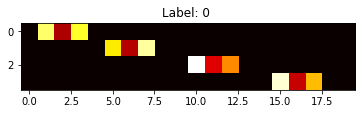

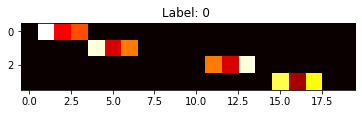

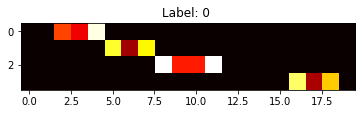

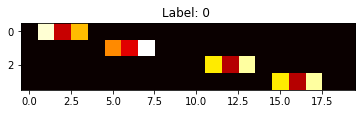

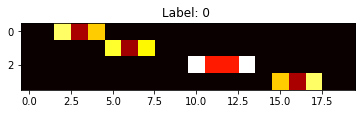

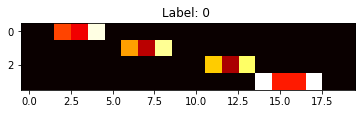

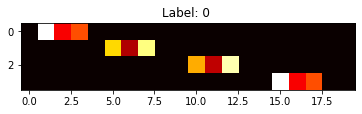

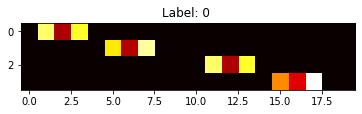

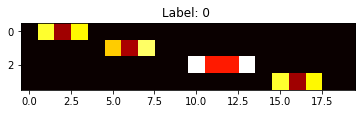

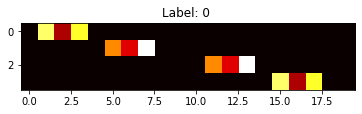

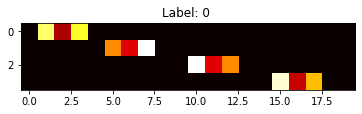

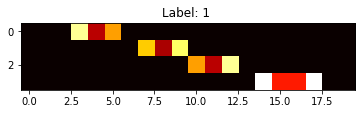

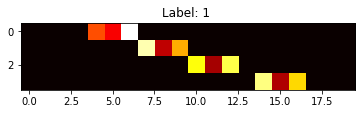

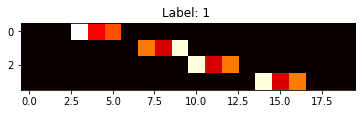

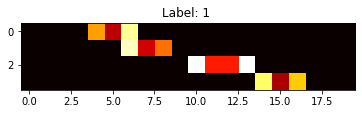

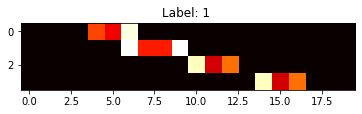

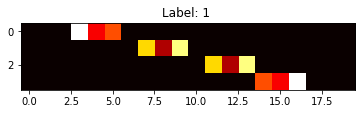

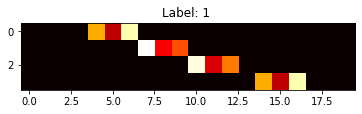

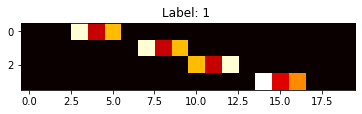

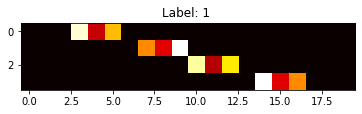

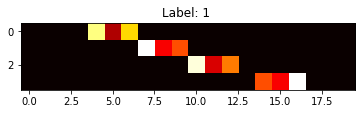

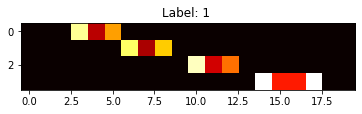

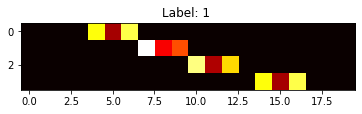

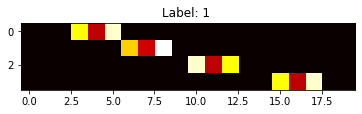

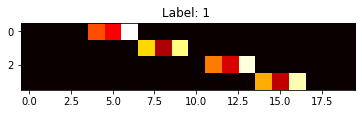

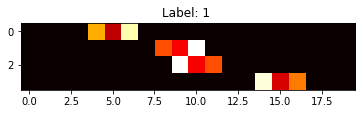

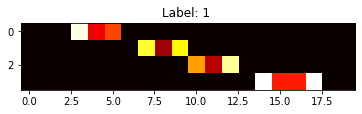

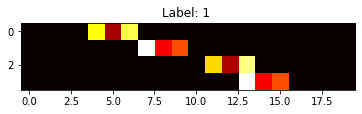

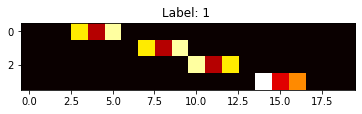

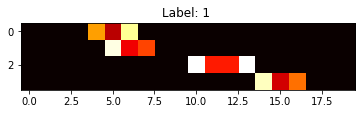

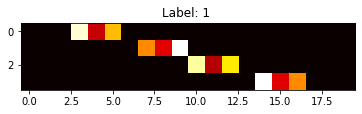

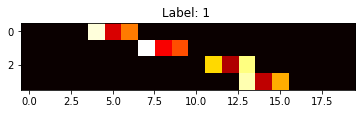

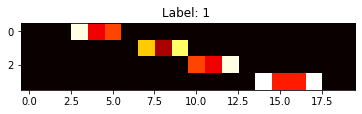

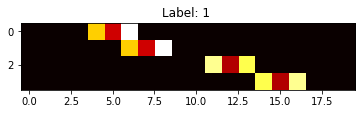

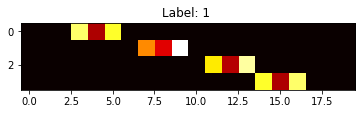

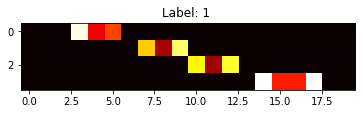

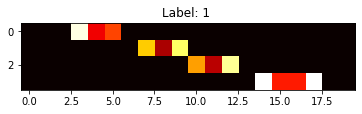

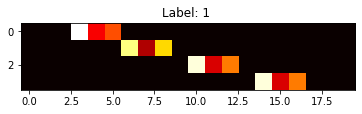

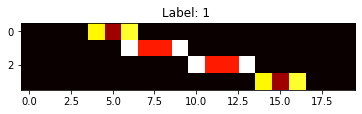

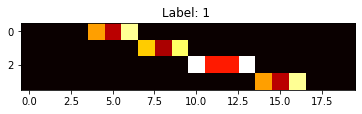

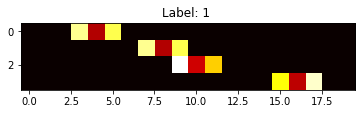

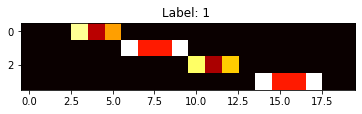

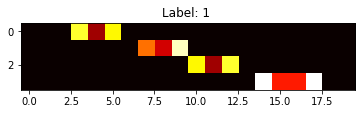

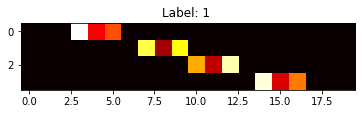

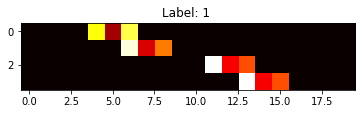

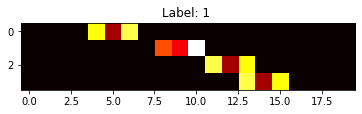

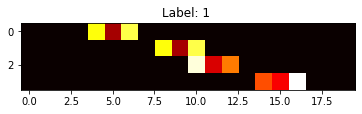

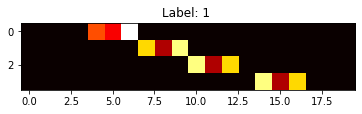

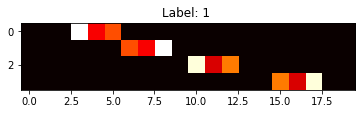

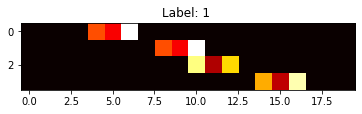

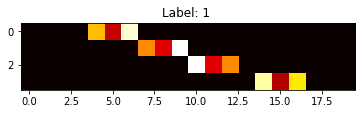

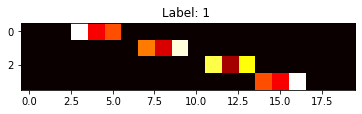

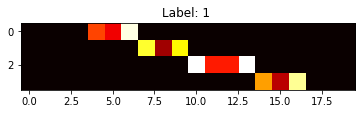

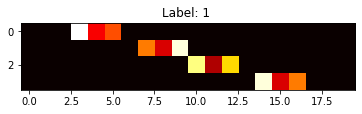

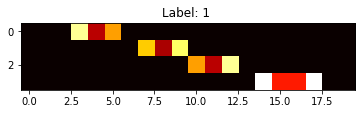

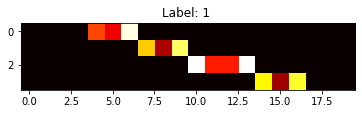

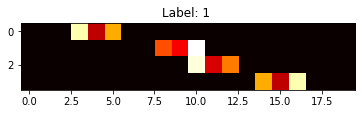

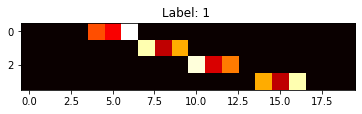

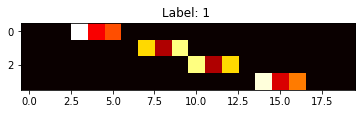

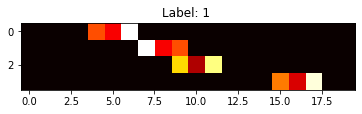

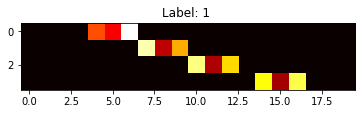

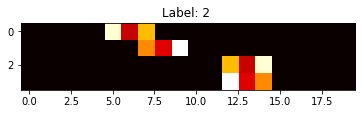

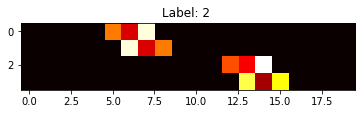

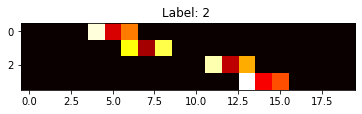

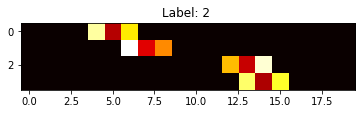

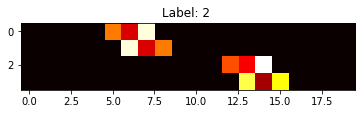

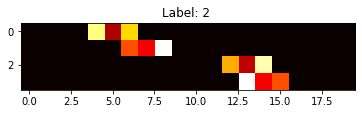

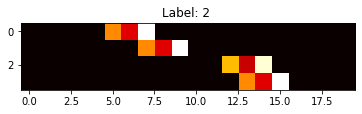

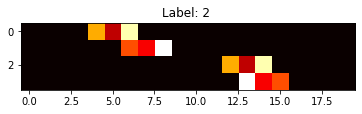

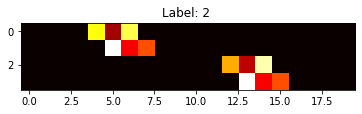

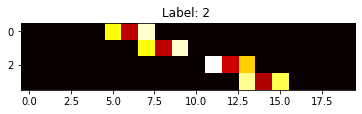

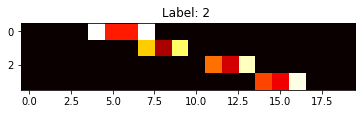

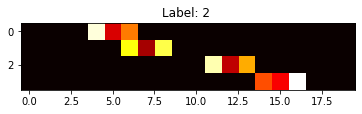

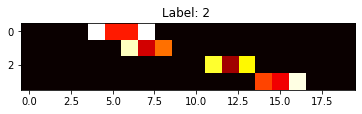

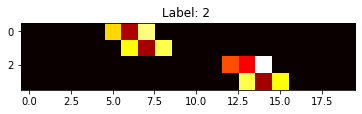

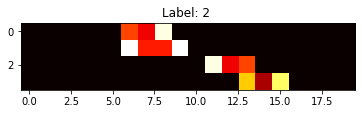

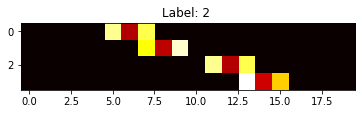

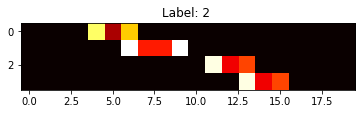

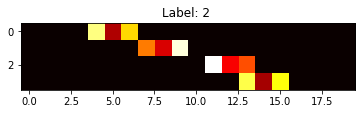

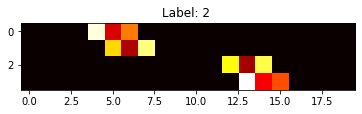

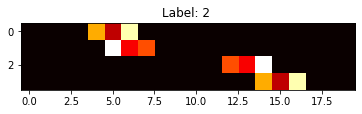

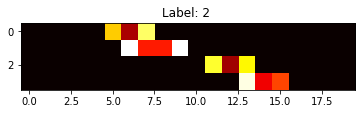

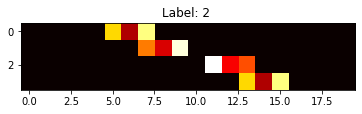

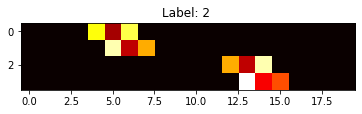

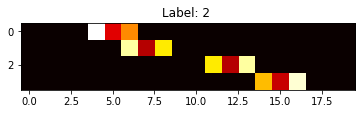

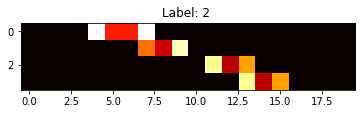

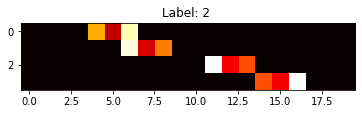

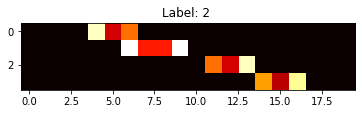

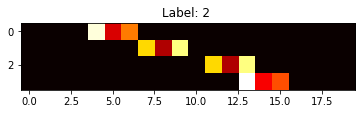

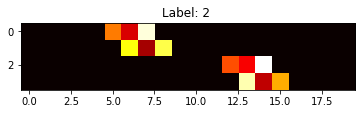

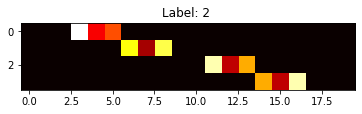

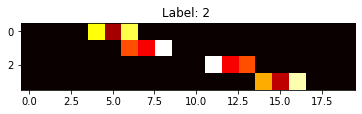

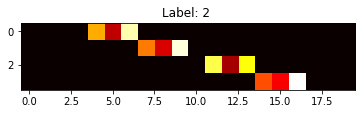

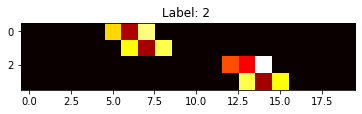

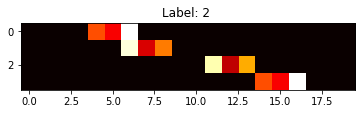

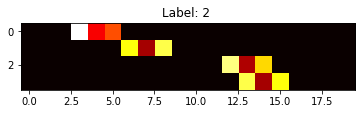

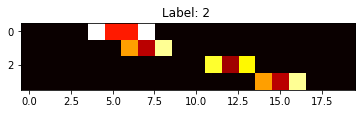

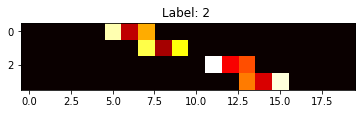

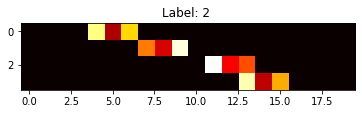

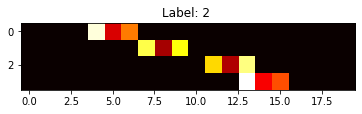

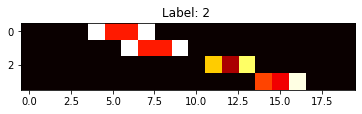

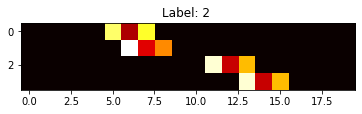

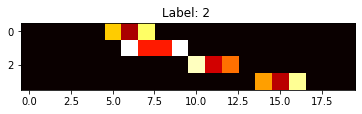

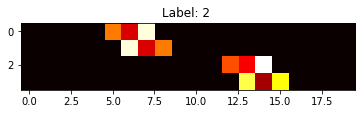

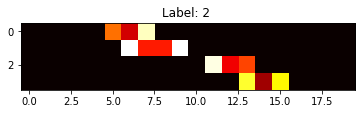

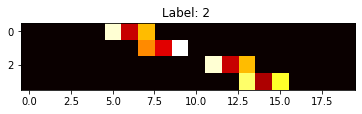

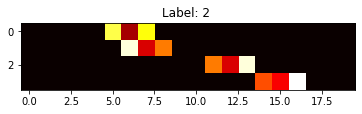

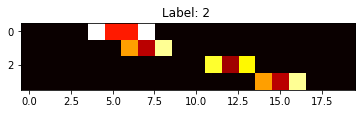

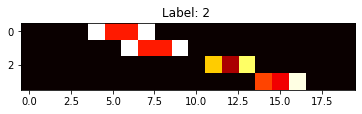

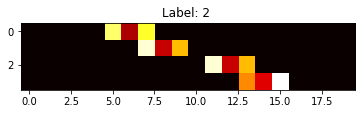

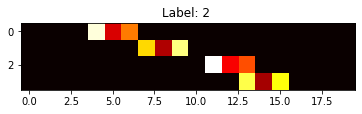

In [18]:
# visualize spike times
for t in range(spike_times.shape[0]):
    visualize_spikes(spike_times[t], y[t])